In [8]:
from __init__ import get_parent_path
import sys
import os
parentPath = get_parent_path()
parentPath += os.path.sep + "src"
if not parentPath in sys.path:
    sys.path.insert(1, parentPath)

In [58]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.inception_v3 import preprocess_input

import numpy as np 

import matplotlib.pyplot as plt

from scipy.spatial import distance as dist

from sklearn.metrics.pairwise import cosine_similarity

from shutil import rmtree, move

from getData import import_data

In [78]:
TO_SEARCH_IMG_PATH = os.path.join('..','input','download2.jpg')
PARENT_PATH = os.path.join('..','input','val')

In [79]:
model = load_model("../models/InceptionV3--v1.h5")
trainSet = import_data("train")
keys = list(trainSet.class_indices.keys())
values = list(trainSet.class_indices.values())

Found 4024 images belonging to 5 classes.


In [80]:
def predict_class(imgPath):
    img = image.load_img(imgPath, target_size=(224,224))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data1 = preprocess_input(img_data)
    pred = model.predict(img_data1, verbose=0)
    return pred

def get_label(imgPath):
    pred = predict_class(imgPath)
    label = keys[values[np.argmax(pred.squeeze())]]
    return label

prepare_prediction = lambda x: np.array(x).flatten()

In [81]:
pred_label = get_label(TO_SEARCH_IMG_PATH)
furniture_path = os.path.join(PARENT_PATH, pred_label)
base_pred = predict_class(TO_SEARCH_IMG_PATH)
base_pred = prepare_prediction(base_pred)

In [82]:
mindist = 10000
maxcosine = 0

In [83]:
for i, filename in enumerate(os.listdir(furniture_path)[:2]):
    imgtrain = predict_class(os.path.join(furniture_path,filename))
    pred = prepare_prediction(imgtrain)
    euclidist = dist.euclidean(base_pred, pred)
    if mindist > euclidist:
        mindist = euclidist
        minfilename = filename
    dot_product = np.dot(base_pred, pred)
    norm_X = np.linalg.norm(pred)
    norm_Y = np.linalg.norm(base_pred)
    cosine_similarity = dot_product / (norm_X * norm_Y)
    if maxcosine < cosine_similarity:
        maxcosine = cosine_similarity
        cosfilename = filename

In [84]:
os.path.join(PARENT_PATH,filename)

'..\\input\\val\\00000390.jpg'

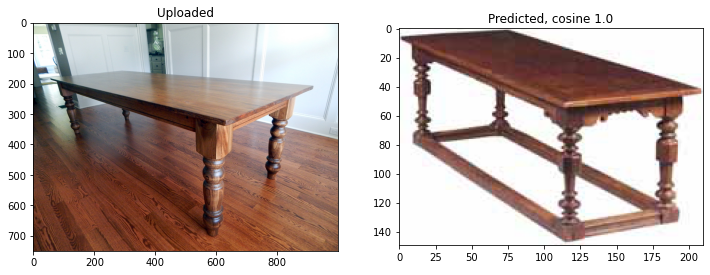

In [90]:
img = image.load_img(os.path.join(PARENT_PATH, pred_label,filename))
img0 = image.load_img(TO_SEARCH_IMG_PATH)

plt.figure(figsize=(12, 12))

plt.subplot(1, 2, 1)
plt.title("Uploaded")
plt.imshow(img0)
plt.subplot(1, 2, 2)
plt.title(f"Predicted, cosine {maxcosine:.5}")
plt.imshow(img)